In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt

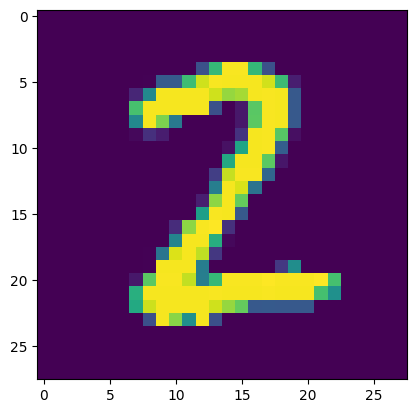

In [6]:
plt.imshow(df.iloc[22,1:].values.reshape(28,28))

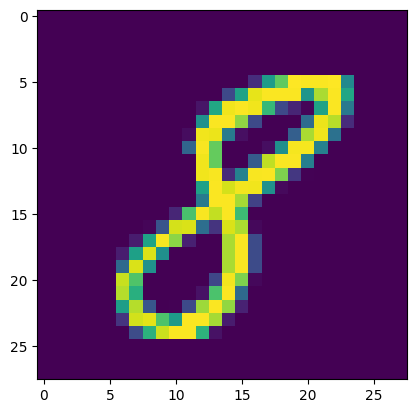

In [7]:
plt.imshow(df.iloc[30,1:].values.reshape(28,28))

In [8]:
# now split the x and y
X  = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state = 42)

In [10]:
X_train.shape,X_test.shape

((33600, 784), (8400, 784))

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

14.771723985671997


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [16]:
# okay now let's apply the pca and try to obtain the same amount of accuracy
# Step 1 : Mean centering staderization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#import PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components = 200)

In [19]:
start = time.time()

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

print(time.time()-start)

8.476224899291992


In [20]:
X_train_trf.shape # only 100 column is remaining

(33600, 200)

In [21]:
X_test_trf.shape

(8400, 200)

In [22]:
knn = KNeighborsClassifier()

In [23]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = knn.predict(X_test_trf)

In [25]:
accuracy_score(y_test,y_pred2)*100

94.98809523809524

In [26]:
# for i in range(1,785):
#     pca = PCA(n_components = 200)
    
#     X_train_trf = pca.fit_transform(X_train)
    
#     X_test_trf = pca.transform(X_test)
    
#     knn = KNeighborsClassifier()
    
#     knn.fit(X_train_trf,y_train)
    
#     y_pred2 = knn.predict(X_test_trf)
    
#     print(accuracy_score(y_test,y_pred2)*100)
    
    

In [27]:
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [28]:
X_train_trf.shape

(33600, 2)

In [29]:
import plotly.express as px

y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                y = X_train_trf[:,1],
                 color = y_train,
                 color_discrete_sequence= px.colors.qualitative.G10
                )
fig.show()

In [30]:
pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
y_train_trf = pca.transform(X_test)

In [31]:
X_train_trf

array([[-2.71863196, -0.48992219,  1.13554516],
       [-0.67695679, -6.75396195, -2.33634309],
       [-3.0332454 ,  6.51000845,  7.49225927],
       ...,
       [ 2.14883048,  0.78091807, -0.74752061],
       [ 1.0595555 ,  0.94761154,  3.94969055],
       [17.7025897 ,  1.96158742, -4.94428072]])

In [32]:
# 3d plot 
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0],
                y = X_train_trf[:,1],
                z = X_train_trf[:,2],
                 color = y_train_trf)

fig.update_layout(
                  margin=dict(l=20, r=20 ,t=10,b=10)
                  )  
    
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [33]:
# Eigen values
pca.explained_variance_

array([40.67111198, 29.17023396, 26.744596  ])

In [34]:
# Eigen vectors
# 3 eigen values
pca.components_

array([[-9.95418234e-18,  4.72614610e-19,  1.99491655e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.06729342e-17,  4.95994200e-18,  9.16368426e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.22975843e-16, -8.00074820e-18, -1.55335257e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [36]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

# Finding the best optimal principle component 

In [38]:
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

# NOTE : if the the eigen values represent the 90% of the varience of the data then that is the optimal number of priciple component we can take

In [40]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

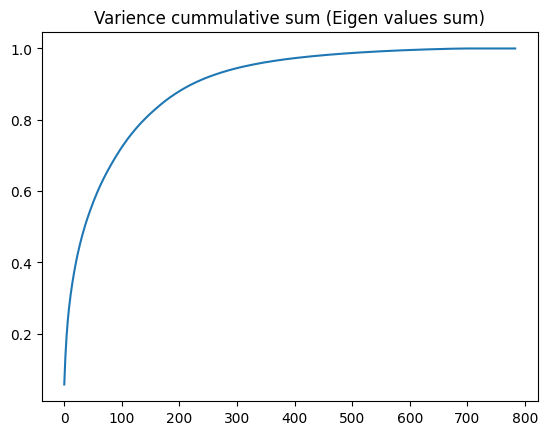

In [43]:
# Calculate the cummilative sum and then plot it to find the 90% verience
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Varience cummulative sum (Eigen values sum)")
plt.show()

In [54]:
values = np.array(pca.explained_variance_ratio_*100)

In [55]:
sum = 0
count = 0  # Start count from 0
for i in values:
    sum += i
    count += 1
    if sum >= 90:
        print(count)
        break


223


In [56]:
print(count) # so 223 is the best optimal value for the pricicple compnent

223


In [57]:
pca = PCA(n_components = 223)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [60]:
y_pred3 = knn.predict(X_test_trf)

In [61]:
accuracy_score(y_test,y_pred3)

0.9497619047619048